<a href="https://colab.research.google.com/github/sppu33/DSBDAL/blob/main/dsbdal9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [25]:
df=pd.read_csv('Social_Network_Ads.csv')

In [26]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
df.shape

(400, 5)

In [28]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [29]:
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64
Purchased,int64


In [30]:
print(df['Purchased'].unique())

[0 1]


In [31]:
df.drop(['User ID'], axis=1, inplace=True)

In [32]:
# df['Gender']=df['Gender'].map({'Male':0, 'Female':1})

In [33]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [34]:
print(df['Gender'].unique())

['Male' 'Female']


In [35]:
df['Gender']=df['Gender'].map({'Male':1, 'Female':0})

In [36]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [37]:
y=df['Purchased']
X=df.drop(['Purchased'],axis=1)

In [38]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [39]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


<Axes: >

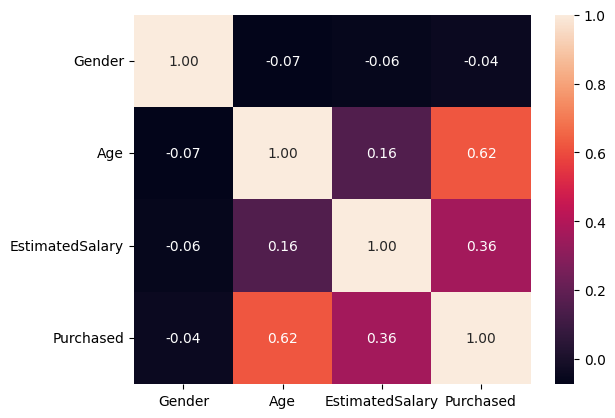

In [43]:
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")

Gender does not affect anything much

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=123)

In [47]:
scaler=StandardScaler()

In [48]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
model=LogisticRegression()

In [50]:
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred=model.predict(X_test)

# confusion matrix

In [54]:
cm= confusion_matrix(y_test, y_pred)

In [69]:
TN,FP,FN,TP=cm.ravel()

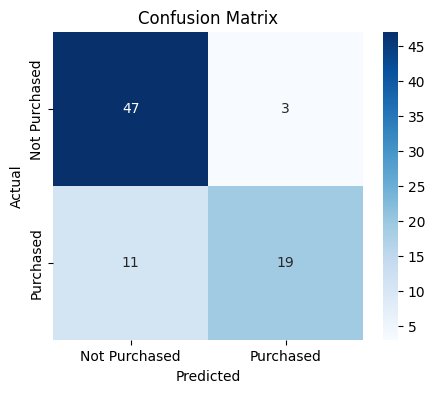

In [71]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues",xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics

In [56]:
acc_score=accuracy_score(y_test,y_pred)

In [57]:
err_rate=1-acc_score

In [58]:
precision=precision_score(y_test,y_pred)

In [59]:
recall=recall_score(y_test,y_pred)

In [68]:
#  results
print("Confusion Matrix: ", cm)
print("Accuracy Score: ",acc_score)
print("Error rate: ",err_rate)
print("Precision: ",precision)
print("Recall: ",recall)
print(f"Tn:{TN}, Fp:{FP}, Fn:{FN}, Tp:{TP}")

Confusion Matrix:  [[47  3]
 [11 19]]
Accuracy Score:  0.825
Error rate:  0.17500000000000004
Precision:  0.8636363636363636
Recall:  0.6333333333333333
Tn:47, Fp:3, Fn:11, Tp:19
